chebyshev.ipynb was getting too big, so we're starting a new one

In [1]:
from sympy import init_session
init_session()
%matplotlib inline

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


Now we try to mechanise the CRAM process

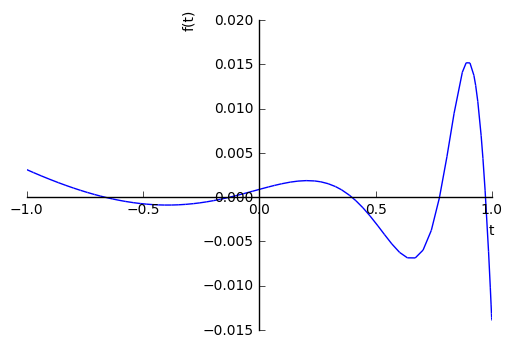

In [8]:
def CRAM_exp2():
    epsilon = symbols("epsilon")
    p0, p1, p2, q1, q2 = symbols("p0, p1, p2, q1, q2")
    i = symbols("i")
    
    E = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)
    expr = E + (-1)**i*epsilon
    expr = expr*(1 + q1*t + q2*t**2)
    expr = simplify(expr)

    system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(7, 6-j)}) for j in range(1,7)])
    sols = [dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))]
    plot(E.subs(sols[0]), (t, -1, 1))
    D = diff(E.subs(sols[0]), t)
    extreme_x2 = [-1, nsolve(diff(E.subs(sols[0]), t), (-1, 0), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), (0, 0.5), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), (0.5, .7), solver='bisect'), nsolve(diff(E.subs(sols[0]), t), 0.9), 0.999]
    return D

D = CRAM_exp2()

In [36]:
nsolve(D, (-1, -0.39506511254484362 - 1e-20), solver='bisect', tol=1e-20)

mpf('-0.39506511254484362')

In [30]:
import mpmath
mpmath.findroot?